In [2]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [32]:
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)



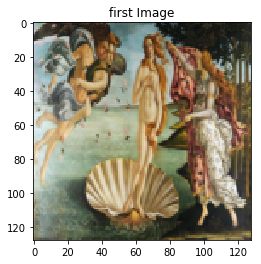

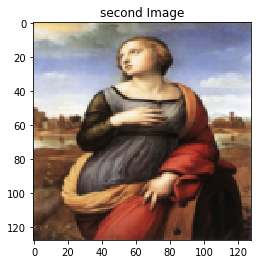

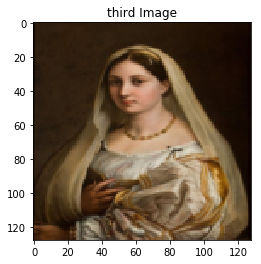

In [33]:
unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated


plt.figure()
imshow(first_img, title='first Image')

plt.figure()
imshow(second_img, title='second Image')
imshow(third_img, title='third Image')

In [6]:
def gram_matrix(inp):
    a, b, c, d = inp.size()  # a=batch size(=1)
    # b=number of feature maps
    # (c,d)=dimensions of a f. map (N=c*d)

    features = inp.view(a * b, c * d)  # resise F_XL into \hat F_XL

    G = torch.mm(features, features.t())  # compute the gram product

    # we 'normalize' the values of the gram matrix
    # by dividing by the number of element in each feature maps.
    return G.div(a * b * c * d)

In [7]:
cnn = models.vgg19(pretrained=True).features.to(device).eval()

In [9]:
class StyleMatrix(nn.Module):

    def __init__(self):
        super(StyleMatrix, self).__init__()

    def forward(self, inp):
        G = gram_matrix(inp)
        return inp

In [25]:
test_img = first_img
model = copy.deepcopy(cnn)
print(model)
newmodel = torch.nn.Sequential(*(list(model.children())[:15])+[StyleMatrix()])

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

loss: tensor(13.4094, grad_fn=<MeanBackward0>)


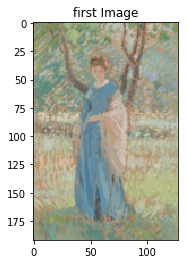

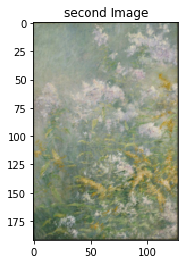

loss: tensor(23.5128, grad_fn=<MeanBackward0>)


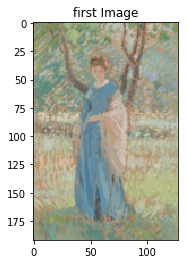

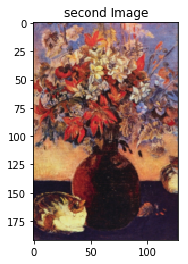

loss: tensor(28.9132, grad_fn=<MeanBackward0>)


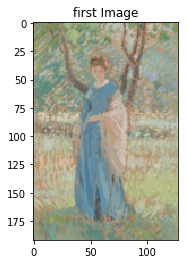

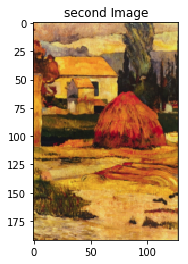

loss: tensor(52.6910, grad_fn=<MeanBackward0>)


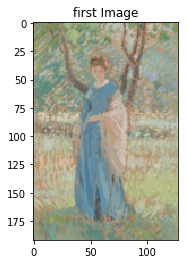

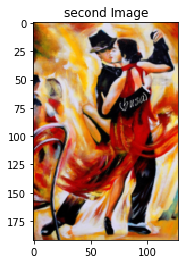

loss: tensor(24.0502, grad_fn=<MeanBackward0>)


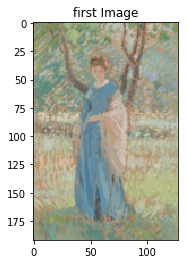

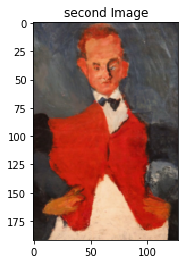

loss: tensor(24.5244, grad_fn=<MeanBackward0>)


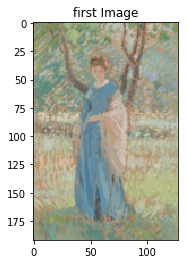

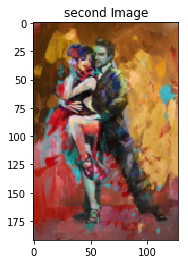

loss: tensor(21.6869, grad_fn=<MeanBackward0>)


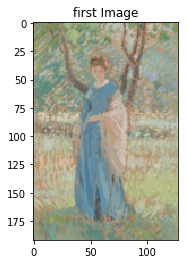

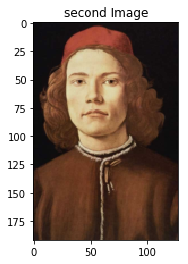

loss: tensor(18.1743, grad_fn=<MeanBackward0>)


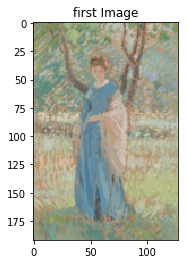

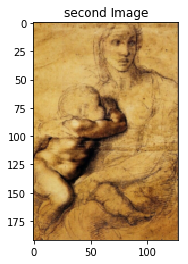

loss: tensor(28.6940, grad_fn=<MeanBackward0>)


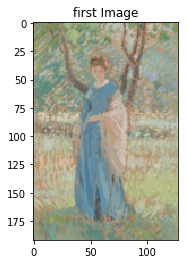

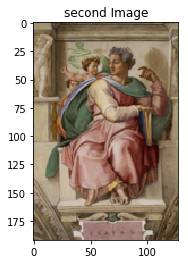

loss: tensor(14.2010, grad_fn=<MeanBackward0>)


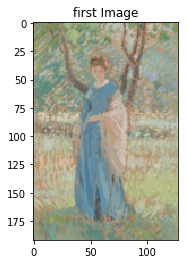

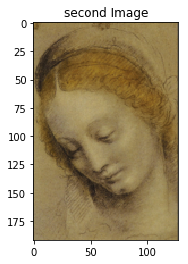

loss: tensor(22.2990, grad_fn=<MeanBackward0>)


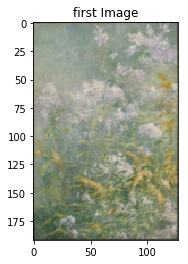

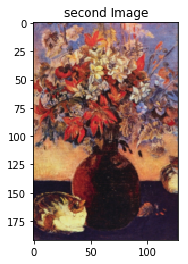

loss: tensor(27.5812, grad_fn=<MeanBackward0>)


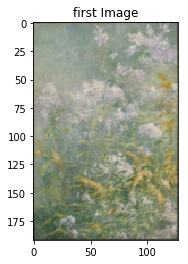

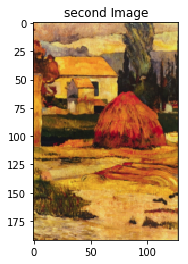

loss: tensor(51.6729, grad_fn=<MeanBackward0>)


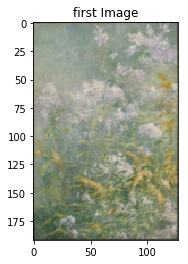

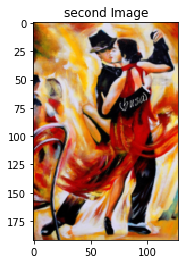

loss: tensor(23.0516, grad_fn=<MeanBackward0>)


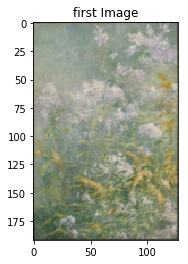

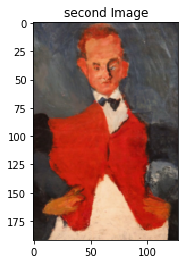

loss: tensor(23.8129, grad_fn=<MeanBackward0>)


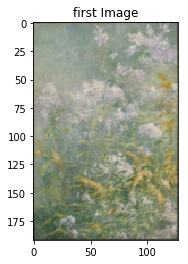

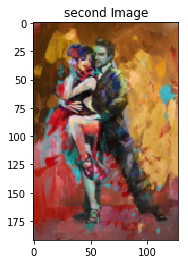

loss: tensor(20.4354, grad_fn=<MeanBackward0>)


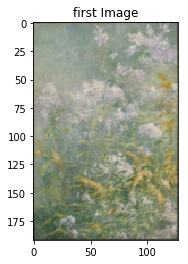

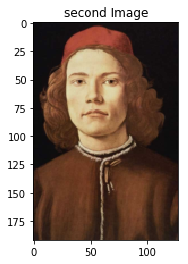

loss: tensor(16.3376, grad_fn=<MeanBackward0>)


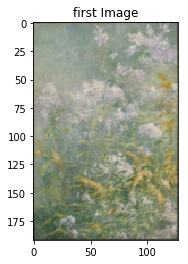

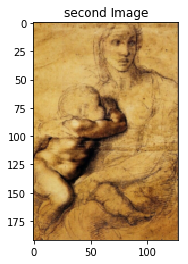

loss: tensor(27.7949, grad_fn=<MeanBackward0>)


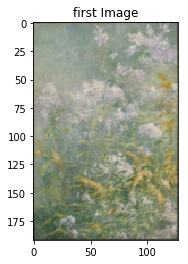

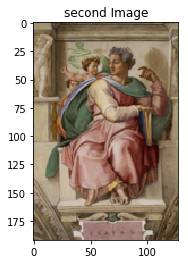

loss: tensor(11.4711, grad_fn=<MeanBackward0>)


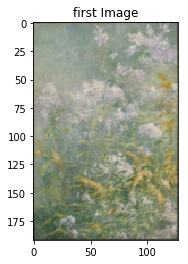

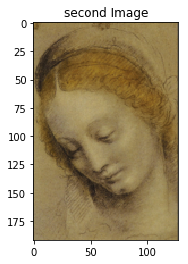

loss: tensor(35.7661, grad_fn=<MeanBackward0>)


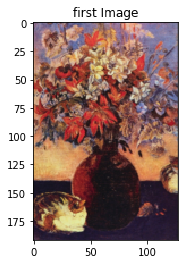

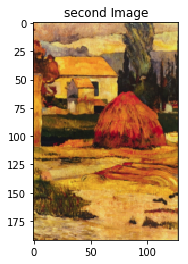

loss: tensor(58.5580, grad_fn=<MeanBackward0>)


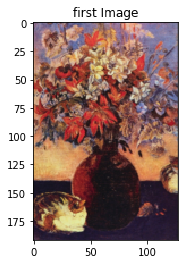

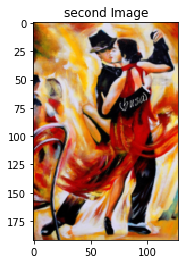

loss: tensor(31.2040, grad_fn=<MeanBackward0>)


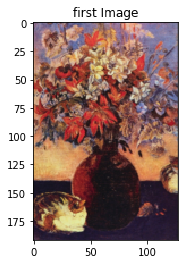

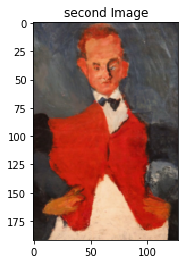

loss: tensor(32.0362, grad_fn=<MeanBackward0>)


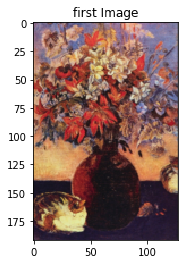

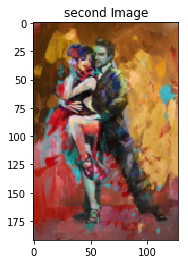

loss: tensor(30.7123, grad_fn=<MeanBackward0>)


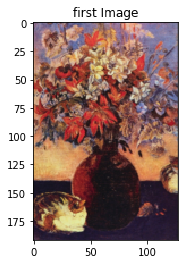

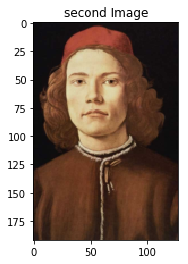

loss: tensor(26.8541, grad_fn=<MeanBackward0>)


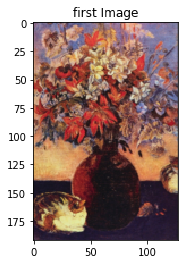

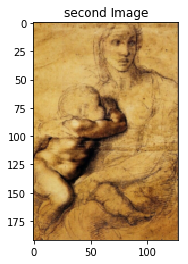

loss: tensor(36.3642, grad_fn=<MeanBackward0>)


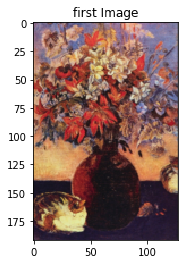

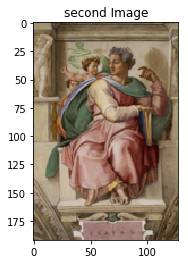

loss: tensor(23.0938, grad_fn=<MeanBackward0>)


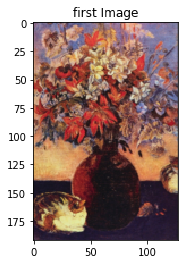

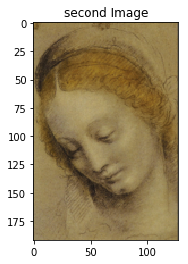

loss: tensor(61.0761, grad_fn=<MeanBackward0>)


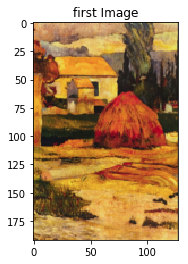

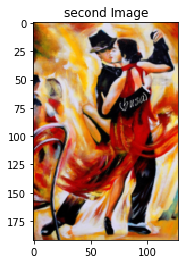

loss: tensor(35.9167, grad_fn=<MeanBackward0>)


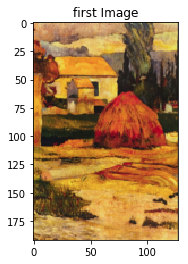

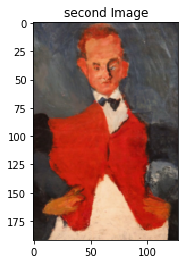

loss: tensor(37.0405, grad_fn=<MeanBackward0>)


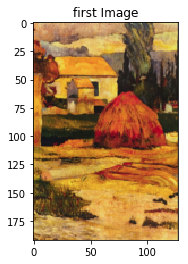

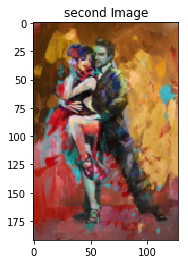

loss: tensor(33.4751, grad_fn=<MeanBackward0>)


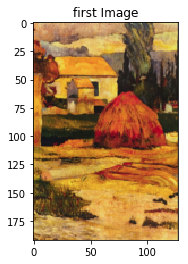

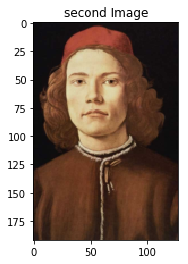

loss: tensor(30.4663, grad_fn=<MeanBackward0>)


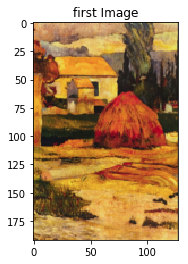

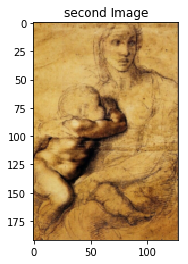

loss: tensor(39.6942, grad_fn=<MeanBackward0>)


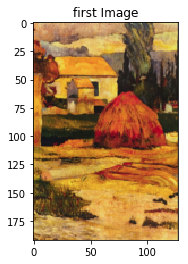

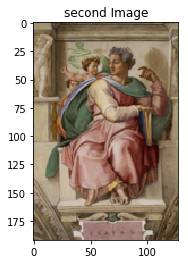

loss: tensor(27.9107, grad_fn=<MeanBackward0>)


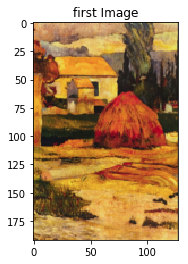

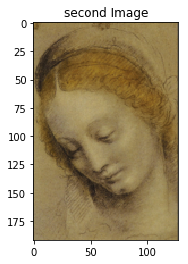

loss: tensor(57.6394, grad_fn=<MeanBackward0>)


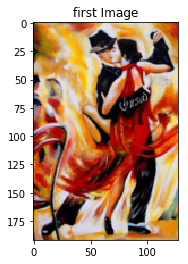

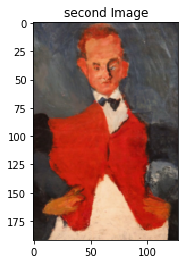

loss: tensor(57.9689, grad_fn=<MeanBackward0>)


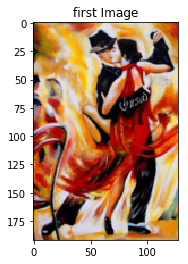

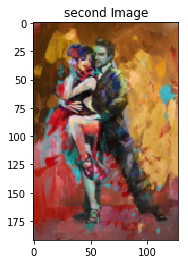

loss: tensor(55.6017, grad_fn=<MeanBackward0>)


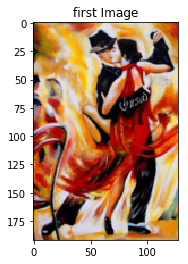

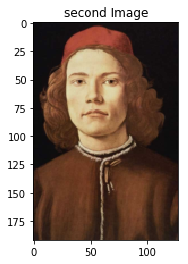

loss: tensor(53.7228, grad_fn=<MeanBackward0>)


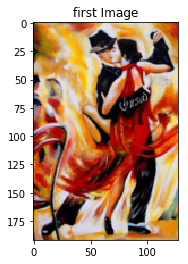

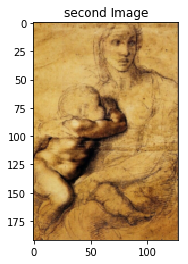

loss: tensor(59.1930, grad_fn=<MeanBackward0>)


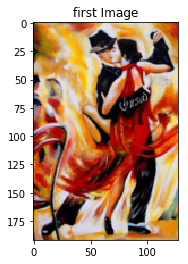

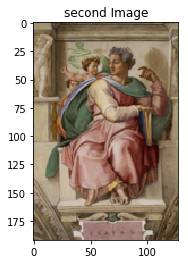

loss: tensor(51.5694, grad_fn=<MeanBackward0>)


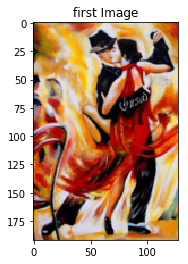

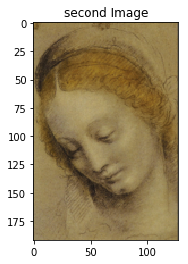

loss: tensor(33.2046, grad_fn=<MeanBackward0>)


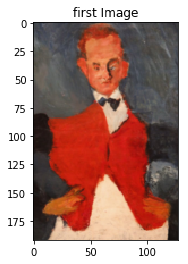

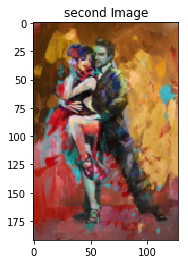

loss: tensor(28.9210, grad_fn=<MeanBackward0>)


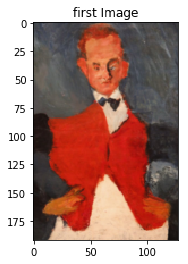

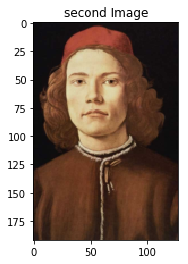

loss: tensor(25.9144, grad_fn=<MeanBackward0>)


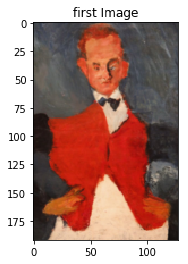

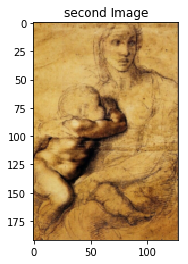

loss: tensor(34.4474, grad_fn=<MeanBackward0>)


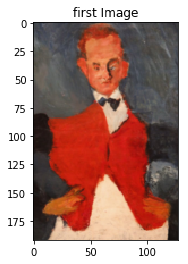

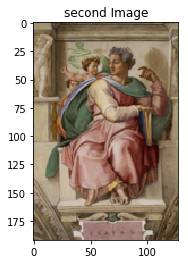

loss: tensor(22.7816, grad_fn=<MeanBackward0>)


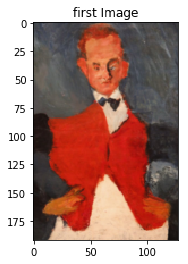

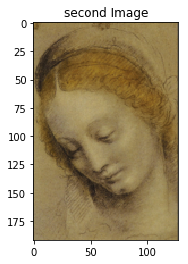

loss: tensor(29.4298, grad_fn=<MeanBackward0>)


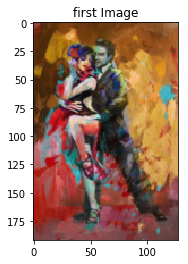

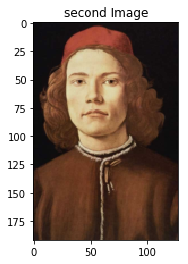

loss: tensor(28.4343, grad_fn=<MeanBackward0>)


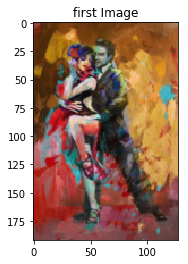

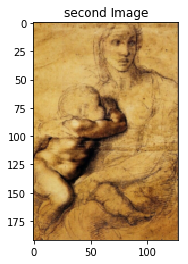

loss: tensor(35.8862, grad_fn=<MeanBackward0>)


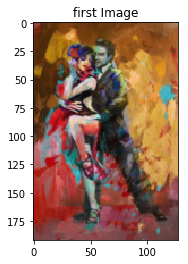

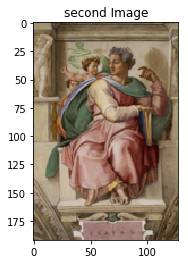

loss: tensor(23.5435, grad_fn=<MeanBackward0>)


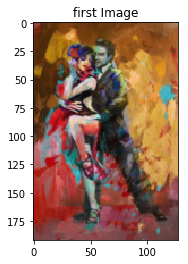

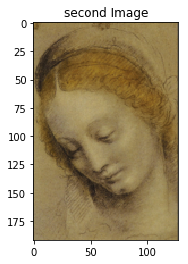

loss: tensor(25.1779, grad_fn=<MeanBackward0>)


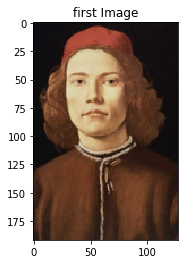

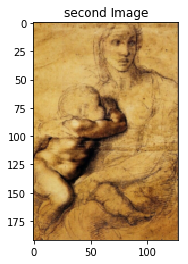

loss: tensor(32.8849, grad_fn=<MeanBackward0>)


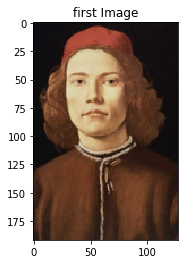

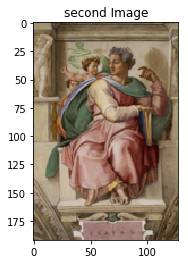

loss: tensor(18.7234, grad_fn=<MeanBackward0>)


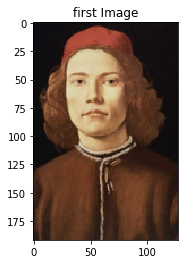

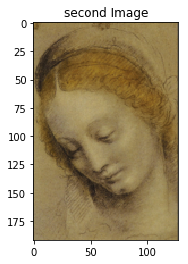

loss: tensor(30.9453, grad_fn=<MeanBackward0>)


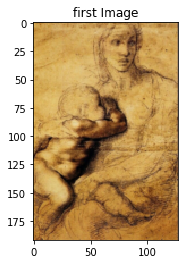

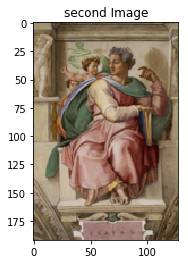

loss: tensor(15.9161, grad_fn=<MeanBackward0>)


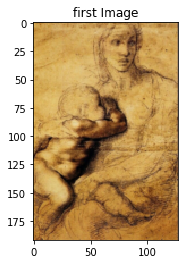

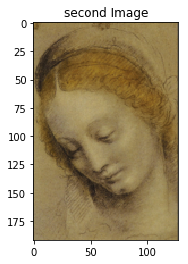

loss: tensor(26.8335, grad_fn=<MeanBackward0>)


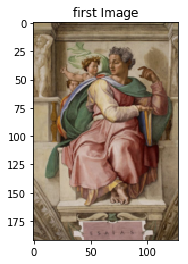

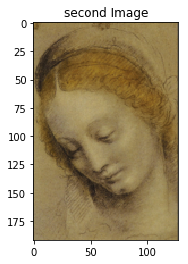

In [35]:
import os
images = []
for i in os.listdir():
    if os.path.isfile(i) and not i.endswith(".ipynb"):
        images.append(image_loader(i))
loss = nn.MSELoss()
for i in range(len(images)):
    for j in range(i+1, len(images)):
        first_res = newmodel(images[i])
        second_res = newmodel(images[j])
        print("loss:", loss(first_res, second_res))
        plt.figure()
        imshow(images[i], title='first Image')
        plt.figure()
        imshow(images[j], title='second Image')